In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as skl
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.cluster import KMeans

import tensorflow as tf

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential


In [2]:
# For use in colab
from google.colab import drive
drive.mount('gdrive')
drive.mount('/content/drive')


Mounted at gdrive
Mounted at /content/drive


In [3]:
# For use in colab
wine_df = pd.read_csv('/content/drive/MyDrive/Project 4/Wine_data.csv')

# wine_df = pd.read_csv('Wine_data.csv')
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,White,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## **PREPROCESSING**

In [4]:
wine_df = wine_df.dropna()
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,White,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df = wine_df[wine_df['alcohol'] > 0]
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,White,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
#split dataset into features and target
X = wine_df.drop(columns=['quality'], axis=1)
y = wine_df['quality']

In [7]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [8]:
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [9]:
#Convert categorical data to numerical
X_dummies= pd.get_dummies(X)
X_dummies.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_Red,type_White
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,1


## Scaling Data

* Train/Test
* StandardScaler

In [10]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

In [11]:
# Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)


In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled[0]

array([ 0.05854974, -0.48548263,  1.17498503, -0.08824573, -0.82309739,
        0.08441988, -0.14688854, -0.36299198,  0.1307045 ,  0.03992248,
        0.25267266, -0.57577022,  0.57577022])

# SUPERVISED 

# Logistic Regression

In [13]:
LR_classifier = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
LR_classifier

LogisticRegression(max_iter=1000)

In [14]:
print(f"Training Data Score: {LR_classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {LR_classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5451559934318555
Testing Data Score: 0.5464615384615384


# Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {RF_classifier.score(X_train_scaled, y_train)}')
print(f'Testing Score: {RF_classifier.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6843076923076923


# Attempt to Identify Important Features

[0.07583077 0.09994205 0.08172098 0.08385426 0.08568783 0.08484513
 0.09121212 0.10113635 0.08270865 0.08677182 0.12069161 0.00286116
 0.00273729]


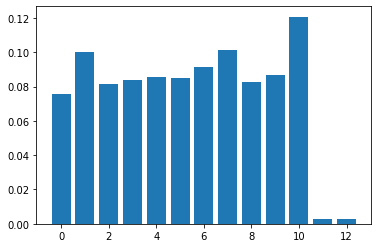

In [16]:
#Maybe this can further confirm that Alcohol(10) is one of the most important quality predictors
features = RF_classifier.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features, )
plt.show()


In [17]:
from sklearn.feature_selection import SelectFromModel

In [18]:
sel = SelectFromModel(RF_classifier)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False])

In [19]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_dummies), y, random_state=1)
scaler_sel = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler_sel.transform(X_selected_train)
X_selected_test_scaled = scaler_sel.transform(X_selected_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
X_selected_train_scaled[0]

array([-0.89968907,  0.64038766,  0.73479841, -0.2907024 ,  1.16051479,
        0.93754526,  0.23475296, -0.4881866 ,  0.2635406 , -0.57175424])

In [21]:
LR_classifier_sel = LogisticRegression(max_iter=1000).fit(X_selected_train_scaled, y_train)
print(f"Training Data Score: {LR_classifier_sel.score(X_selected_train_scaled, y_train)}")
print(f"Testing Data Score: {LR_classifier_sel.score(X_selected_test_scaled, y_test)}")

Training Data Score: 0.5389983579638752
Testing Data Score: 0.5427692307692308


In [22]:
RF_classifier_sel = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {RF_classifier_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {RF_classifier_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.692923076923077


In [23]:
X.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [24]:
y.dtypes

dtype('int64')

type
Cannot calculate correlation between quality and type


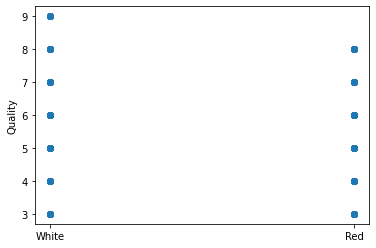

fixed acidity
The correlation between quality and fixed acidity is -0.08


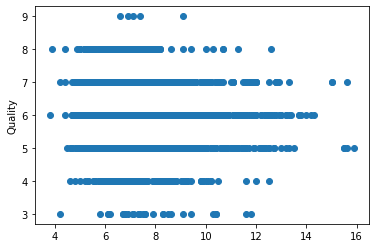

volatile acidity
The correlation between quality and volatile acidity is -0.27


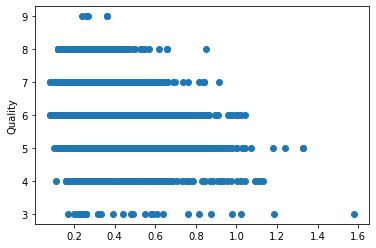

citric acid
The correlation between quality and citric acid is 0.09


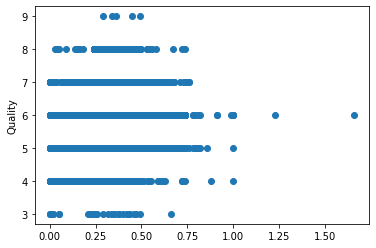

residual sugar
The correlation between quality and residual sugar is -0.04


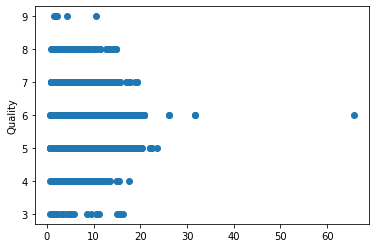

chlorides
The correlation between quality and chlorides is -0.2


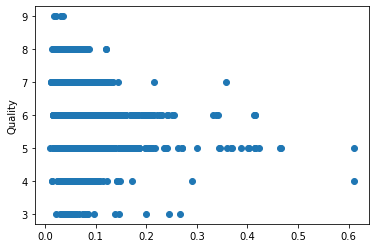

free sulfur dioxide
The correlation between quality and free sulfur dioxide is 0.06


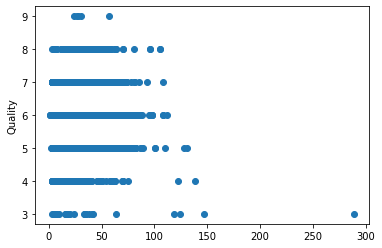

total sulfur dioxide
The correlation between quality and total sulfur dioxide is -0.04


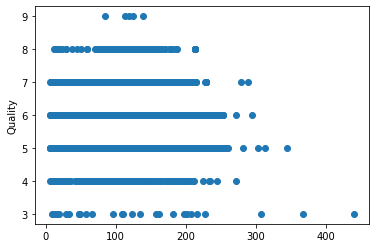

density
The correlation between quality and density is -0.31


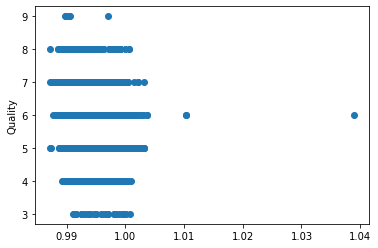

pH
The correlation between quality and pH is 0.02


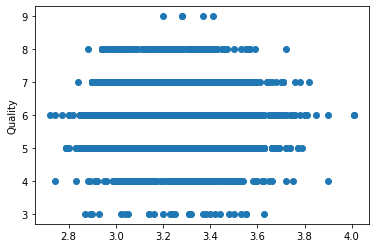

sulphates
The correlation between quality and sulphates is 0.04


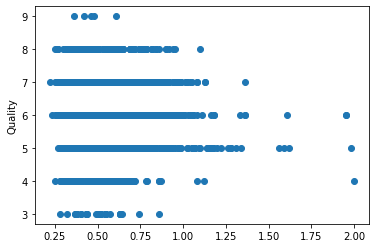

alcohol
The correlation between quality and alcohol is 0.44


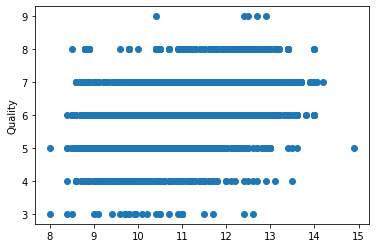

In [25]:
import scipy.stats as st

for col in X.columns:
    try:
      print(col)
      correlation = st.pearsonr(X[col],y)
      print(f"The correlation between quality and {col} is {round(correlation[0],2)}")
      plt.scatter(X[col],y)
      plt.ylabel("Quality")
      plt.show()
    except:
      print(f"Cannot calculate correlation between quality and {col}")
      plt.scatter(X[col],y)
      plt.ylabel("Quality")
      plt.show()

type


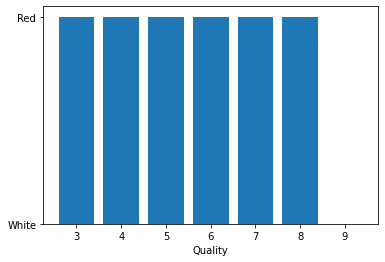

fixed acidity


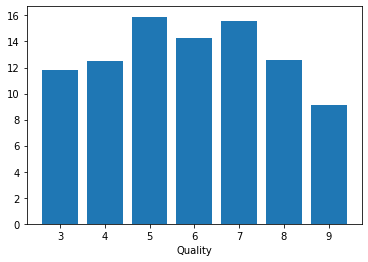

volatile acidity


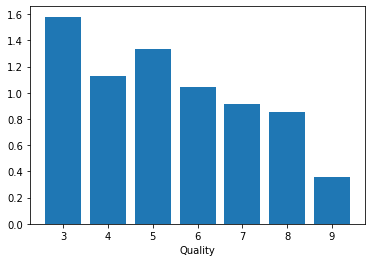

citric acid


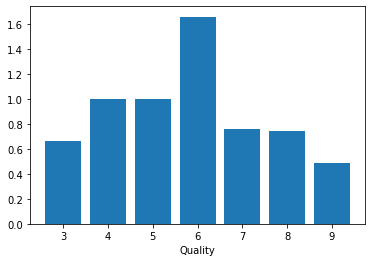

residual sugar


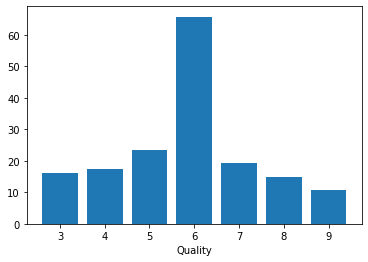

chlorides


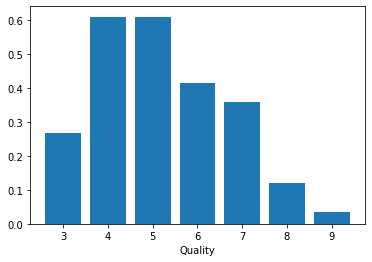

free sulfur dioxide


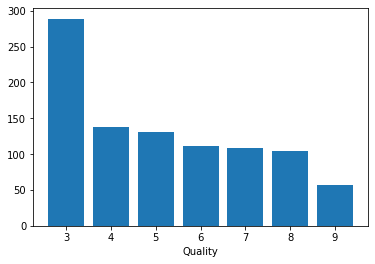

total sulfur dioxide


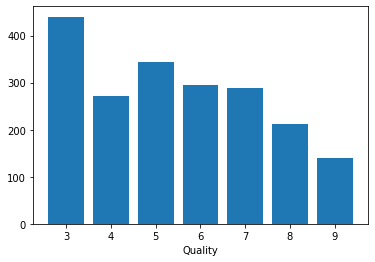

density


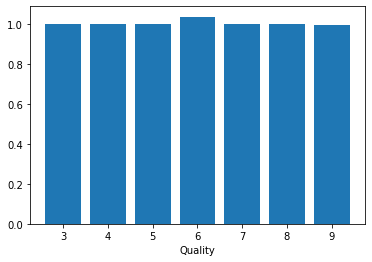

pH


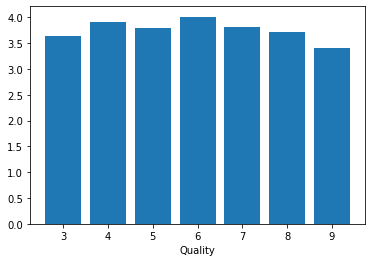

sulphates


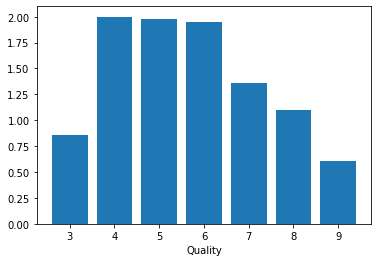

alcohol


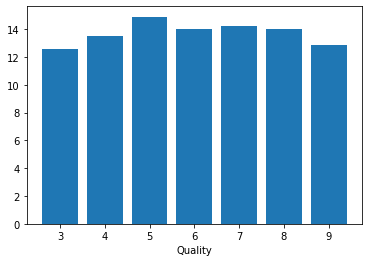

In [26]:
for col in X.columns:
    print(col)
    plt.bar(y, X[col])
    plt.xlabel("Quality")
    plt.show()

# Linear Regression

[-0.02631998 -0.01497359 -0.00285508 -0.06456793  0.00100446  0.02659645
  0.01074017  0.06931834 -0.01609881  0.01115288  0.02346652 -0.00671255
  0.00671255]


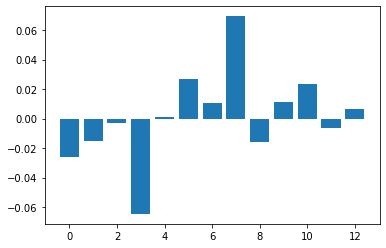

In [27]:
LinReg = LinearRegression().fit(X_train_scaled, y_train)
print(LinReg.coef_)
plt.bar(range(len(X_dummies.columns)), LinReg.coef_)
plt.show()

### **LASSO REGRESSION**

[-0. -0.  0. -0.  0.  0.  0. -0. -0.  0. -0. -0.  0.]


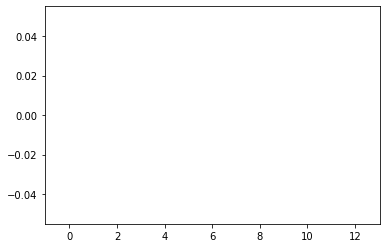

In [28]:
LassoReg = Lasso(max_iter=10000).fit(X_train_scaled, y_train)
print(LassoReg.coef_)
plt.bar(range(len(X_dummies.columns)), LassoReg.coef_)
plt.show()

In [29]:
print(f'Training Score: {LassoReg.score(X_train_scaled, y_train)}')
print(f'Testing Score: {LassoReg.score(X_test_scaled, y_test)}')

Training Score: 0.0
Testing Score: -0.0006542082102201086


# Other Regressors

In [30]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [32]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

test_model(Lasso(max_iter=10000), data)
test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: Lasso
Train score: 0.0
Test Score: -0.0006542082102201086

Model: LinearRegression
Train score: 0.0020496589283476307
Test Score: -0.0024690303867656027

Model: KNeighborsRegressor
Train score: 0.1891931375923328
Test Score: -0.21737234197742294

Model: RandomForestRegressor
Train score: 0.7351723867385025
Test Score: -0.15509101365933842

Model: ExtraTreesRegressor
Train score: 0.8462945999135139
Test Score: -0.30619331731411426

Model: AdaBoostRegressor
Train score: 0.012325212068761915
Test Score: -0.0036020993554111147

Model: SVR
Train score: 0.06140453973008775
Test Score: -0.013790775734852101



In [33]:
data[0][0]

array([ 0.05854974, -0.48548263,  1.17498503, -0.08824573, -0.82309739,
        0.08441988, -0.14688854, -0.36299198,  0.1307045 ,  0.03992248,
        0.25267266, -0.57577022,  0.57577022])

# Multiple Model/Fit w/Important Feature Selection

In [34]:
data_sel = [X_selected_train_scaled, X_selected_test_scaled, y_train, y_test]


test_model(Lasso(max_iter=10000), data_sel)
test_model(LinearRegression(), data_sel)
test_model(KNeighborsRegressor(), data_sel)
test_model(RandomForestRegressor(), data_sel)
test_model(ExtraTreesRegressor(), data_sel)
test_model(AdaBoostRegressor(), data_sel)
test_model(SVR(C=1.0, epsilon=0.2), data_sel)


Model: Lasso
Train score: 0.0
Test Score: -0.0006542082102201086

Model: LinearRegression
Train score: 0.2789077965450776
Test Score: 0.32218634784550904

Model: KNeighborsRegressor
Train score: 0.5789406687670435
Test Score: 0.36346841346951264

Model: RandomForestRegressor
Train score: 0.9317543033014747
Test Score: 0.5282127701985737

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.5524125470355841

Model: AdaBoostRegressor
Train score: 0.3395964859498587
Test Score: 0.33178427201280647

Model: SVR
Train score: 0.4625896809996546
Test Score: 0.41834722840106575



In [35]:
data_sel[0][0]

array([-0.89968907,  0.64038766,  0.73479841, -0.2907024 ,  1.16051479,
        0.93754526,  0.23475296, -0.4881866 ,  0.2635406 , -0.57175424])

## To use RandomForestClassifier as the prediction model for the wine quality!!


In [36]:
# Prediction using RandomForestClassifier
predictions = RF_classifier.predict(X_test_scaled)
result_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
result_df.head(50)


,Prediction,Actual
3772,7,6
6009,6,7
3464,6,5
1518,6,6
3761,5,7
1070,6,7
2809,6,7
3516,5,7
3817,5,6
5754,6,6


# Pickle

In [37]:
import pickle
import requests
import json



In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [39]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)


In [40]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [41]:
# Saving model to disk
# pickle.dump(RF_classifier, open('model.pkl','wb'))
pickle.dump(clf, open('/content/drive/MyDrive/Project 4/model.pkl','wb'))

# save the scaler
# pickle.dump(scaler, open('scale.pkl','wb'))
pickle.dump(X_scaler, open('/content/drive/MyDrive/Project 4/scale.pkl','wb'))
# Loading model to compare the results


In [42]:
# Testing the pickle
# scaler = pickle.load(open('scaler.pkl', 'rb'))
# model = pickle.load(open('model.pkl','rb'))

model = pickle.load(open('/content/drive/MyDrive/Project 4/model.pkl','rb'))
scaler = pickle.load(open('/content/drive/MyDrive/Project 4/scale.pkl', 'rb'))


test_data = [[9.1,0.27,0.45,10.6,0.035,28,124,0.997,3.2,0.46,10.4,1,0]]

data_scaled = scaler.transform(test_data)

print(model.predict(data_scaled))

[9]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


### **UNSUPERVISED**

In [43]:
#use dummies dataset to scale the whole thing without splitting it
scaler = StandardScaler()
X_scaler2 = scaler.fit(X_dummies)

In [44]:
X_scaled = X_scaler.transform(X_dummies)
X_scaled[0]

array([-0.15291101, -0.41642283,  0.29492974,  3.22145174, -0.31973807,
        0.82174738,  0.95514422,  2.10431528, -1.35591558, -0.54449577,
       -1.41251432, -0.57387413,  0.57387413])

In [45]:
# Initialize PCA model
pca = PCA(n_components=.9)

# Get two principal components for the iris data.
wine_pca = pca.fit_transform(X_scaled)


In [46]:
wine_pca.shape

(6497, 8)

In [47]:
pca.explained_variance_ratio_.sum()

0.9359617981739639

### **TSNE**

In [48]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(wine_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [49]:
tsne_features.shape 


(6497, 2)

In [50]:
# PCA Data loaded into dataframe
tsne_df = pd.DataFrame(data=tsne_features)
tsne_df.head()

,0,1
0,12.674125,93.519585
1,-16.770235,1.953169
2,-16.533716,35.381912
3,21.975935,34.629131
4,21.975994,34.629200


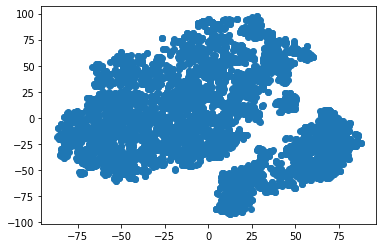

In [51]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### **K-MEANS**

In [52]:
inertia = []
k = list(range(1, 10))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,24132884.0
1,2,14797480.0
2,3,7601097.5
3,4,6054759.0
4,5,4648764.0


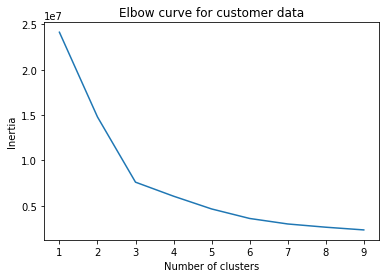

In [53]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

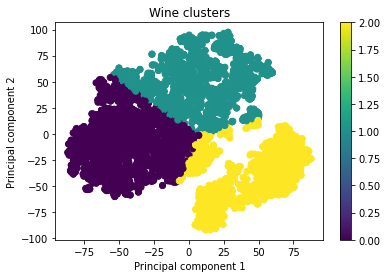

In [54]:
model = KMeans(n_clusters=3, random_state=0)

model.fit(tsne_features)

predictions = model.predict(tsne_features)

plt.scatter(x=tsne_features[:,0], y=tsne_features[:,1], c=model.labels_)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Wine clusters')
plt.colorbar()
plt.show()

compare the above results to the ACTUAL ratings

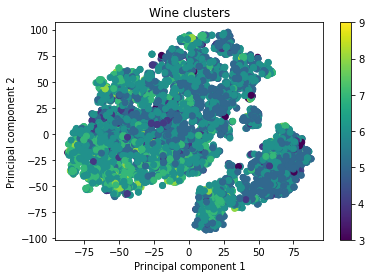

In [55]:
# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(tsne_features)

# Predict clusters
predictions = model.predict(tsne_features)

plt.scatter(x=tsne_features[:,0], y=tsne_features[:,1], c=y)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Wine clusters')
plt.colorbar()
plt.show()

### **DBSCAN**

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
wine_df['x'] = X_scaled[:,10]
wine_df['y'] = X_scaled[:,3]

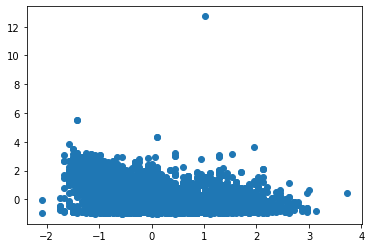

In [58]:
plt.scatter(wine_df['x'], wine_df['y'])
plt.show()


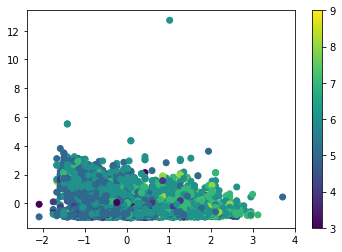

In [59]:
plt.scatter(wine_df['x'], wine_df['y'], c=y)
plt.colorbar()
plt.show()

In [60]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

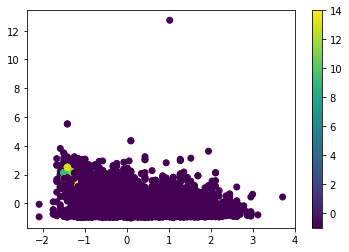

In [61]:
plt.scatter(wine_df['x'], wine_df['y'], c=labels)
plt.colorbar()
plt.show()

### **Deep Learning**

In [62]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential

In [63]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=1)

In [64]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [65]:
nn = tf.keras.models.Sequential()

# First hidden layer
input_dimensions = 13

nn.add(tf.keras.layers.Dense(units=70, activation="relu", input_dim=input_dimensions))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="relu"))
# nn.add(tf.keras.layers.Dense(units=20, activation="sigmoid"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 70)                980       
                                                                 
 dense_1 (Dense)             (None, 50)                3550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,581
Trainable params: 4,581
Non-trainable params: 0
_________________________________________________________________


In [66]:
nn.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
# nn.compile(loss="mean_squared_error", optimizer="Adam", )

In [67]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=3)

Epoch 1/3
153/153 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/3
153/153 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/3
153/153 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [68]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 239ms/epoch - 5ms/step
Loss: 0.0, Accuracy: 0.0
